In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import numpy
import pandas as pd

In [3]:
file = "/home/mb/IdeaProjects/opt_models/packing-problem/filtered.txt"


def parse_filtered_file(file):
    with open(file) as f:
        lines = [l.split(" ")[-8:] for l in f.readlines() if "For" not in l]
        lines = [[ll.split("=") for ll in l] for l in lines]
        lines = [{ll[0]: ll[1][:-1] for ll in l} for l in lines if len(l) > 1]

    for l in lines:
        l["rotation"] = bool(l["rotation"])
        l["area"] = float(l["area"])
        l["rho"] = float(l["rho"])
        l["count"] = int(l["count"])
        l["N"] = int(l["N"])
        l["obj_val"] = float(l["obj_val"])
        l["time"] = float(l["time"])
        l["finished"] = bool(l["finished"])

    return pd.DataFrame(lines)



In [23]:



# df = pd.DataFrame(lines)
df = parse_filtered_file(file)

In [14]:
def split_area_and_count(data):
    area = data.loc[np.abs((data.area - data.obj_val)) < 1e-5]
    count = data.loc[np.abs((data["count"] - data.obj_val)) < 1e-5]
    return area, count


def split_rotation(data):
    columns = ['N', 'rho', 'time', 'area', 'count', 'obj_val', 'finished']
    rotation = data.loc[data.rotation, columns]
    no_rotation = data.loc[np.logical_not(data.rotation), columns]
    return rotation, no_rotation

In [15]:
# rotation = df.loc[df.rotation]
# rotation_area = rotation.loc[rotation.area == rotation.obj_val]
# rotation_count = rotation.loc[rotation.area != rotation.obj_val]
# no_rotation = df.loc[np.logical_not(df.rotation)]
rotation, no_rotation = split_rotation(df)
rot_area, rot_count = split_area_and_count(rotation)
no_rot_area, no_rot_count = split_area_and_count(no_rotation)

In [10]:
def get_lines(data):
    to_stack = []
    rhos = (0.2, 0.4, 0.6, 0.8, 1)
    for rho in rhos:
        if (rho == data.rho).any():
            continue
        to_stack.append({"rho": rho, "N": 0})

    res = pd.concat((data, pd.DataFrame(to_stack)))
    res.index = res.rho
    res = res.loc[list(rhos), "N"]
    return res




In [6]:
data = rot_count
# to_plot = data.loc[:, ["N", "rho", "time"]].groupby(["N", "rho"], as_index=False).max()
cfg_min = data.loc[:, ["N", "rho", "time"]].groupby(["N", "rho"], as_index=False).min()
cfg_min.loc[cfg_min.time < 60 * 60, ["N", "rho"]].groupby("rho", as_index=False).max()

NameError: name 'rot_count' is not defined

In [8]:
# data = rot_count
import matplotlib.pyplot as plt


def divide_by_time(data):
    cfg_max = data.loc[:, ["N", "rho", "time"]].groupby(["N", "rho"], as_index=False).max()
    cfg_min = data.loc[:, ["N", "rho", "time"]].groupby(["N", "rho"], as_index=False).min()
    less_1s = cfg_max.loc[cfg_max.time < 1, ["N", "rho"]].groupby("rho", as_index=False).max()
    less_1m = cfg_max.loc[cfg_max.time < 60, ["N", "rho"]].groupby("rho", as_index=False).max()
    less_1h = cfg_max.loc[cfg_max.time < 60 * 60, ["N", "rho"]].groupby("rho", as_index=False).max()
    one_less_1h = cfg_min.loc[cfg_min.time < 60 * 60, ["N", "rho"]].groupby("rho",
                                                                            as_index=False).max()
    return [less_1s, less_1m, less_1h, one_less_1h]


rhos = (0.2, 0.4, 0.6, 0.8, 1)


def plot_area_lines(lines, ax):
    labels = ['<1s', '<1m', '<1h', "1+ < 1h"]
    for l, lab in zip(reversed(lines), reversed(labels)):
        ax.fill_between(rhos, l, label=lab)
    _ = ax.legend()
    ax.set_xticks(ticks=rhos)
    ax.set_yticks(ticks=list(range(8, 20, 2)))
    ax.set_ylim((10, 20))


def plot_stacked(data, ax):
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    lines = list(map(get_lines, divide_by_time(data)))
    plot_area_lines(lines, ax)


# fig, axes = plt.subplots(1, 4, figsize=(20, 5))
# plot_stacked(rot_count, ax=axes[2])
# axes[2].set_title("Rotation: YES, Of: max_items")
# plt.ylim(10, 20)
pass

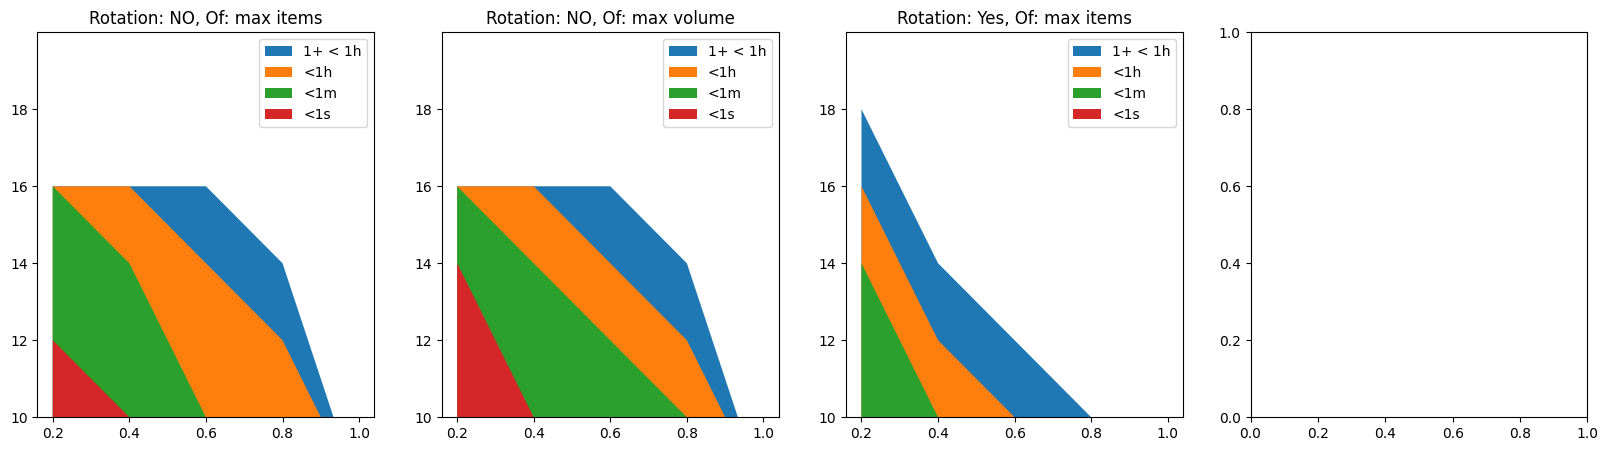

In [11]:
list(range(2, 13, 2))
dir = Path("/home/mb/IdeaProjects/opt_models/packing-problem")
file_names = ("f_count_norot.txt",
              "f_no_rot_vol.txt",
              "f_count_rot.txt",
              )
titles = (
    "Rotation: NO, Of: max items",
    "Rotation: NO, Of: max volume",
    "Rotation: Yes, Of: max items",
)
data = [parse_filtered_file(dir / f) for f in file_names]
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for d, ax, title in zip(data, axes[:-1], titles):
    plot_stacked(d, ax=ax)
    ax.set_title(title)
    # plt.ylim(10, 20)



In [14]:
d = data[0]


False